In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import datetime as dt

In [2]:
from sklearn.preprocessing import MinMaxScaler
from tensorflow import keras
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.models import load_model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM

In [3]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

In [4]:
from pandas import ExcelFile

In [5]:
df = pd.read_excel('VIC Historical Data.xlsx')
df.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,2021-07-01,105422,106400,106578,105333,2.47M,-0.0034
1,2021-07-02,104444,104978,105689,104444,2.01M,-0.0093
2,2021-07-05,102222,104444,104444,102133,3.11M,-0.0213
3,2021-07-06,99556,102222,103111,99556,3.38M,-0.0261
4,2021-07-07,101333,99556,101333,97778,2.82M,0.0178


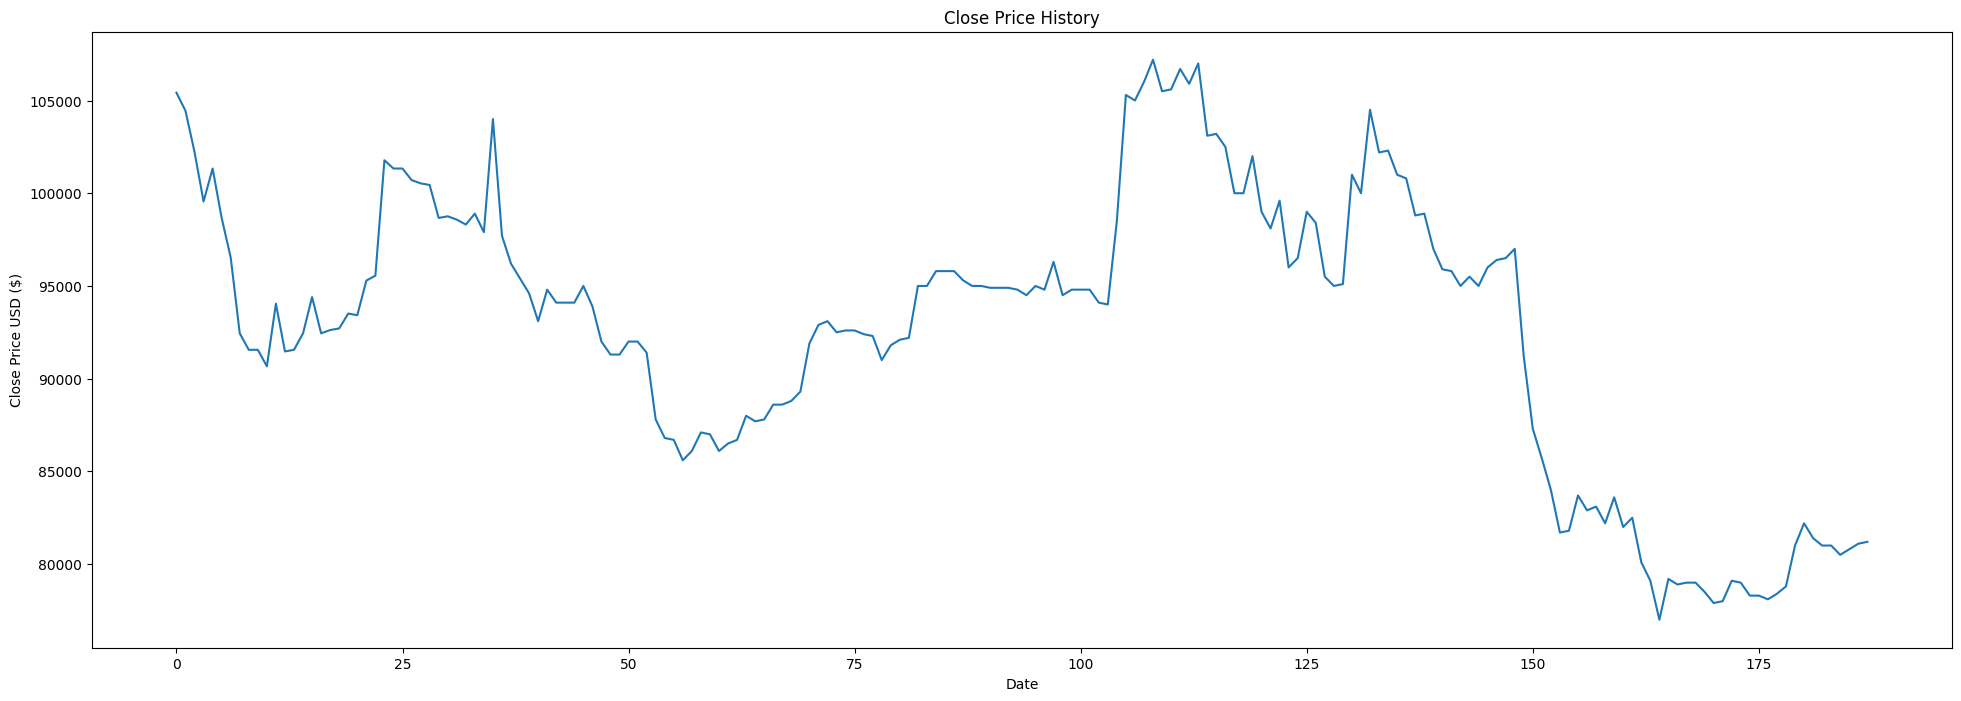

In [6]:
plt.figure(figsize=(24,8))
plt.title('Close Price History')
plt.plot(df['Price'])
plt.xlabel('Date')
plt.ylabel('Close Price USD ($)')
plt.show()

In [7]:
# Create a new dataframe with only the 'Price column 
data = df.filter(['Price'])
# Convert the dataframe to a numpy array
dataset = data.values
# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset)) - 62)

training_data_len

126

In [8]:
# Scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
scaled_data

array([[0.94112583],
       [0.90874172],
       [0.83516556],
       [0.74688742],
       [0.80572848],
       [0.71745033],
       [0.64678808],
       [0.51139073],
       [0.48198675],
       [0.48198675],
       [0.45254967],
       [0.56437086],
       [0.47903974],
       [0.48198675],
       [0.51139073],
       [0.57615894],
       [0.51139073],
       [0.51728477],
       [0.52023179],
       [0.54672185],
       [0.54377483],
       [0.60559603],
       [0.61443709],
       [0.82046358],
       [0.80572848],
       [0.80572848],
       [0.78513245],
       [0.77923841],
       [0.77629139],
       [0.71745033],
       [0.72039735],
       [0.71450331],
       [0.70566225],
       [0.72516556],
       [0.69205298],
       [0.89403974],
       [0.68543046],
       [0.63576159],
       [0.60927152],
       [0.58278146],
       [0.53311258],
       [0.58940397],
       [0.56622517],
       [0.56622517],
       [0.56622517],
       [0.59602649],
       [0.55960265],
       [0.496

In [9]:
# Create the training data set 
# Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

predictions_days = 60

for i in range(predictions_days, len(train_data)):
    x_train.append(train_data[i-predictions_days:i, 0])
    y_train.append(train_data[i, 0])
    if i<= (predictions_days + 1):
        print(x_train)
        print(y_train)
        print()
        
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# x_train.shape

[array([0.94112583, 0.90874172, 0.83516556, 0.74688742, 0.80572848,
       0.71745033, 0.64678808, 0.51139073, 0.48198675, 0.48198675,
       0.45254967, 0.56437086, 0.47903974, 0.48198675, 0.51139073,
       0.57615894, 0.51139073, 0.51728477, 0.52023179, 0.54672185,
       0.54377483, 0.60559603, 0.61443709, 0.82046358, 0.80572848,
       0.80572848, 0.78513245, 0.77923841, 0.77629139, 0.71745033,
       0.72039735, 0.71450331, 0.70566225, 0.72516556, 0.69205298,
       0.89403974, 0.68543046, 0.63576159, 0.60927152, 0.58278146,
       0.53311258, 0.58940397, 0.56622517, 0.56622517, 0.56622517,
       0.59602649, 0.55960265, 0.49668874, 0.47350993, 0.47350993,
       0.49668874, 0.49668874, 0.47682119, 0.35761589, 0.32450331,
       0.32119205, 0.28476821, 0.3013245 , 0.33443709, 0.33112583])]
[0.30132450331125815]

[array([0.94112583, 0.90874172, 0.83516556, 0.74688742, 0.80572848,
       0.71745033, 0.64678808, 0.51139073, 0.48198675, 0.48198675,
       0.45254967, 0.56437086, 0.47

In [10]:
# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(128, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=25)

Epoch 1/25
66/66 [==============================] - 3s 12ms/step - loss: 0.0526
Epoch 2/25
66/66 [==============================] - 1s 12ms/step - loss: 0.0185
Epoch 3/25
66/66 [==============================] - 1s 13ms/step - loss: 0.0153
Epoch 4/25
66/66 [==============================] - 1s 12ms/step - loss: 0.0119
Epoch 5/25
66/66 [==============================] - 1s 12ms/step - loss: 0.0145
Epoch 6/25
66/66 [==============================] - 1s 12ms/step - loss: 0.0120
Epoch 7/25
66/66 [==============================] - 1s 13ms/step - loss: 0.0112
Epoch 8/25
66/66 [==============================] - 1s 13ms/step - loss: 0.0164
Epoch 9/25
66/66 [==============================] - 1s 14ms/step - loss: 0.0111
Epoch 10/25
66/66 [==============================] - 1s 12ms/step - loss: 0.0077
Epoch 11/25
66/66 [==============================] - 1s 12ms/step - loss: 0.0085
Epoch 12/25
66/66 [==============================] - 1s 13ms/step - loss: 0.0102
Epoch 13/25
66/66 [==================

In [11]:
# Create the testing data set
# Create a new array containing scaled values from index 1543 to 2002 
test_data = scaled_data[training_data_len - predictions_days: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(predictions_days, len(test_data)):
    x_test.append(test_data[i-predictions_days:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

2/2 [==============================] - 1s 16ms/step


3164.1554733827884

C:\Users\DELL\AppData\Local\Temp\ipykernel_39196\2294235708.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


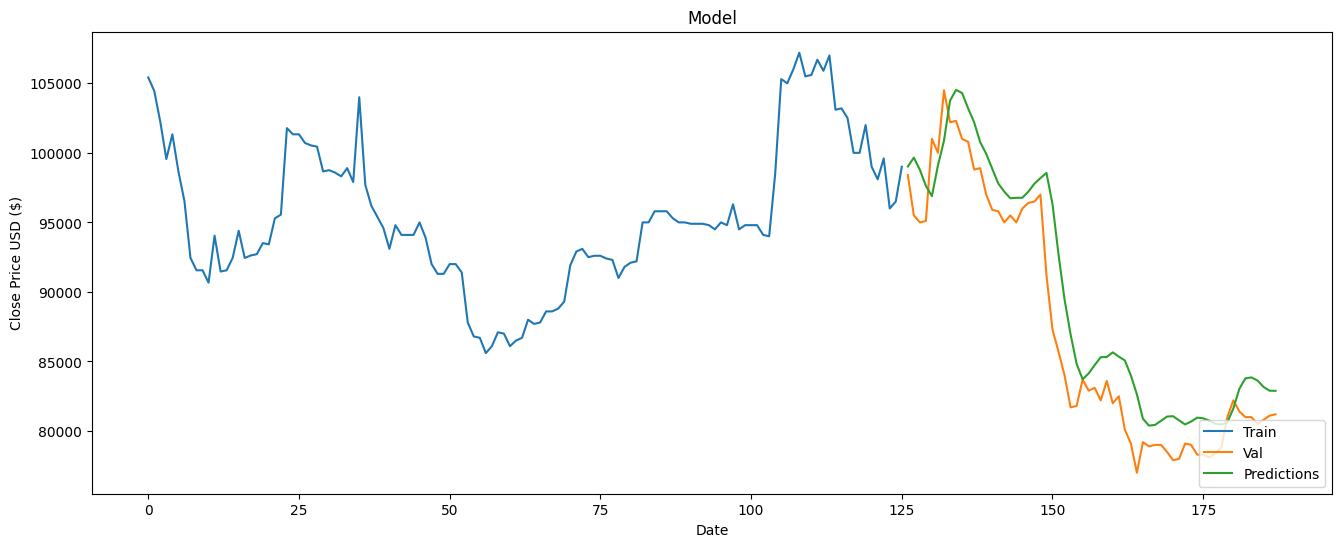

In [12]:
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date')
plt.ylabel('Close Price USD ($)')
plt.plot(train['Price'])
plt.plot(valid[['Price', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()